We train a model defined as
$$\begin{align}
&B = b(X, Y) =\frac{A}{r_1(X, Y)} + r_2(X, Y), \quad r_i(X, Y) = n_{i0} + n_{i1} g(X, Y)^{\gamma_{i1}} + n_{i2} h(X)^{\gamma_{i2}} \\
&A = 1 - f_Y(X), \quad f_y(X) = {\rm Prob}(Y=y|X)\\
&g(X, Y) \approx {\rm E}_{A|X, Y}(A), \quad h(X) = \sum_{y\in {\cal Y}} (1 - g(X, y)) \log(1 - g(X, y))
\end{align}$$
by minimizing the size of the prediction sets.
The first localization function, $g$, is a model for the conditional expectation of $A$.
The second localization function, $h$, approximates the entropy of the classifier.

The average size of the test prediction sets at a given confidence level, $\alpha$ is a non-differentiable funtion of the parameters, $\theta =(n_1, n_2)$, 
$$\begin{align}
&L(\theta, \alpha) = \frac{1}{N}\sum_{n=1}^N \sum_{y\in {\cal Y}} {\bf 1}(b(X_n, y) < Q_B(\alpha))\\
&Q_B(\alpha) = \inf_q \left\{ \sum_{n'=1}^{N'}{\bf 1}(b(X_{n'}, Y_{n'}) \leq q) \geq n_{\alpha}\right\}, \quad n_{\alpha}=\lceil (1 - \alpha)(N + 1) \rceil
\end{align}$$
Observing that $$ \left\{ Q_B(\alpha_{n'}), \alpha_{n'}=\frac{n'}{N'}\right\}_{n'=1}^{N'} = \left\{ b(X_{n'}, Y_{n'}) \right\}_{n'=1}^{N'}$$ and averaging over all non-equivalent confidence levels, $\alpha=\frac{1}{N'}, \frac{2}{N'}, \dots, \frac{N'- 1}{N'}, 1$, we obtain 
$$\begin{align}
&L(\theta) = {\rm E}_\alpha L(\theta, \alpha) = \frac{1}{N}\frac{1}{N'}\sum_{n=1}^N \sum_{n'=1}^{N'}\sum_{y\in {\cal Y}} {\bf 1}(b(X_n, y) < b(X_{n'}, Y_{n'}))
\end{align}$$
The non-differentiability in $L(\theta)$ comes from the indicators, which we can rewrite as 
$${\bf 1}(a < b) = \lim_{M\to\infty} \sigma(M (b-a))$$
and smothen by choosing an arbitrarity small *nonzero temperature*, $M = \frac{1}{T} < \infty$.
To focus on high-confidence sets, we may introduce a non-flat prior for the expectation over $\alpha$
$$ 
{\rm Prob}(\alpha=\alpha_{r}|D_{cal}, K) = w_{R^{-1}(r)}, \quad w_{n'}= w_{n'}(D_{cal}, K) = \frac{e^{K b(X_{n'}, Y_{n'})}}{\sum_{n'=1}^N e^{K b(X_{n'}, Y_{n'
})}}
$$
where $R$ is a permutation that sorts the calibration conformity scores in descending order, i.e. $B_{r}>B_{r'}$ if $r<r'$, $r=R(n)$.  
The objective becomes
$$
\begin{align}
    &{\cal L} = \sum_{n=1}^N \sum_{n'=1}^{N'} w_{n} q_n\\
    & w_n = w_{n}(D_{cal}, K) = \frac{e^{K b(X_n, Y_n)}}{\sum_{n=1}^N e^{K b(X_n, Y_n)}}\\
    &q_n = \sum_{y  \in {\cal Y}} \sigma\left(M (b(X_n, Y_n) - b(X_{n'}, y)) \right)\\
    & b(X, y) = (1 - f_y(X)) e^{- r_1} - r_2, quad r_i = n_{i0} + n_{i1} g(X, y)^{\gamma_{i1}} + n_{i2} h(X)^{\gamma_{i2}}
\end{align}$$
Its gradient is 
$$\begin{align}
&\nabla {\cal L} = \sum_{n=1}^N \sum_{n'=1}^{N'} \nabla w_{n} q_n + M \sum_{n=1}^N \sum_{n'=1}^{N'} w_{n} \nabla q_n \\    
    &\nabla w_n = K w_n \left(\nabla b(X_n, Y_n) - \sum_{n'=1}^N w_{n'} \nabla b(X_{n'}, Y_{n'}) \right)\\
    &\nabla q_n= \sum_{y  \in {\cal Y}}  \sigma'\left(M (b(X_n, Y_n) - b(X_{n'}, y)) \right) (\nabla b(X_n, Y_n) - \nabla b(X_{n'}, y))\\
    & \nabla b(X, y) = - \left((1 - f_y(X)) e^{r_1}\nabla r_1(X, y) + \nabla r_2(X, y)\right), \\
    & \nabla r_i(X, y) = [1, g(X, y)^{\gamma_{i1}}, n_{i1}g(X, y)^{\gamma_{i1}} \log g(X, y),  h(X)^{\gamma_{i2}}, n_{i2} h(X)^{\gamma_{i2}}\log h(X)] 
\end{align}
$$
We run two experiments:
1. To check the quality of the approximation, we evaluate the correlation of the obective values and the size of the prediction sets for a series of random-generated localizers and different values of $K$.
2. We set $K=1$, and, starting from random $\theta$, we show that minimizing the objective on the validation set reduces the size of the prediction sets on the test set.
At each iteration, we use a mini-batch validation set of 100 + 100 samples. 
As a stopping creterion, we may either measure the size of the prediction sets or the value of the objective function on a fixed mini-batch.
In the plot, we show the value of the objective and the size of the prediction sets on the test set. 

In [1]:
import numpy
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
import matplotlib.colors as mcolors


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


In [2]:
#################################################
colors = []
for key, value in mcolors.TABLEAU_COLORS.items():
    colors.append(value)
    
#################################
#general functions
def splitData(X, y):
    t = 5
    n = [i * int(len(X)/t) for i in range(t + 1)]
    return [[X[n[i] : n[i + 1]], y[n[i] : n[i + 1]]]  for i in range(t)]

def quantile(v, alpha):
    m = int(numpy.ceil((1 - alpha) * (len(v) + 1))) - 1
    v = numpy.sort(v, axis = 0)
    return v[m]

def H(p, eps=.01):
    return -sum([s * numpy.log(s + eps) for s in p])

def sigma(x):
    return 1/(1 + numpy.exp(-x))

def sigmaPrime(x):
    return sigma(x) * (1 - sigma(x))

def F1score(sets, y):
    TP, FP, TN, FN = 0, 0, 0, 0
    mclasses = max(y) + 1
    for i in range(len(sets)):
        interval = sets[i]
        positives = [j for j in range(mclasses) if j in interval]
        negatives = [j for j in range(mclasses) if j not in interval]
        TP = TP + sum([1 for j in positives if j == y[i]])
        FP = FP + sum([1 for j in positives if j != y[i]])
        TN = TN + sum([1 for j in negatives if j != y[i]])  
        FN = FN + sum([1 for j in negatives if j == y[i]]) 
    F1 = 2 * TP/(2 * TP + FP + FN)
    return F1

def evaluateCPclass(d1, d2, theta, alpha):
    x, a, g, allas, allg, y, h = d1 
    B = [[b(allas[i][m], allg[i][m], h[i], theta) for m in range(max(y) + 1)] for i in range(len(allas))]
    q = quantile([B[i][y[i]] for i in range(len(y))], alpha)
    
    x, a, g, allas, allg, y, h = d2
    B = [[b(allas[i][m], allg[i][m], h[i], theta) for m in range(max(y) + 1)] for i in range(len(allas))]
    sets = [[m for m in range(max(y) + 1) if B[i][m] < q] for i in range(len(y))]
    F1 = F1score(sets, y)
    sizes = numpy.sum([len(sets[i]) for i in range(len(sets))])/len(y)
    val = numpy.sum([1 for i in range(len(y)) if y[i] in sets[i]])/len(y)
    return sizes, F1, val

#######################################
#experiment functions
def classifier(D):
    X, Y = D
    rf = RandomForestClassifier(max_depth=20, random_state=0)
    rf.fit(X, Y.squeeze())
    return rf    

def approximator(D):
    X, A, Y = D
    print(X.shape, A.shape, Y.shape)
    rf = []
    for m in range(max(Y) + 1): 
        rf.append(RandomForestRegressor(max_depth=25, random_state=0))
        x = numpy.array([X[i] for i in range(len(Y)) if Y[i] == m])
        a = numpy.array([A[i] for i in range(len(Y)) if Y[i] == m])
        rf[-1].fit(x, a.squeeze())
    return rf    

def prepareData(dataset):
    x = dataset[0]
    y = dataset[1]
    allprobs = rfClass.predict_proba(x)
    allas = 1 - allprobs
    
    a = numpy.array([1 - allprobs[i, y[i]].squeeze() for i in range(len(allprobs))])
    allg = numpy.array([rg[i].predict(x) for i in range(max(y) + 1)]).transpose()
    g = numpy.array([allg[i, y[i]].squeeze() for i in range(len(allprobs))])
    #h = numpy.array([H(allprobs[i, :]).squeeze() for i in range(len(allprobs))])
    h = numpy.array([H(1 - allg[i, :]).squeeze() for i in range(len(allg))])
    return x, a, g, allas, allg, y, h


def r(t, g, h):
    return t[0] + t[1] * numpy.power(abs(g), t[2]) + t[3] * numpy.power(abs(h), t[4])

def nablar(t, g, h):
    d = [1, numpy.power(abs(g), t[2]), t[1] * numpy.power(abs(g), t[2]) * numpy.log(abs(g)),  
            numpy.power(abs(h), t[4]), t[3] * numpy.power(abs(h), t[4])* numpy.log(abs(h))]
    return numpy.array(d)
    
def b(a, g, h, theta):
    r1, r2 = [r(t, g, h) for t in theta]
    return a * numpy.exp(-r1) - r2 

def nablab(a, g, h, theta):
    r1, r2 = [r(t, g, h) for t in theta]
    dr1, dr2 =  [nablar(t, g, h) for t in theta]
    return - a * numpy.exp(- r1) * dr1, - dr2

def objective(d1, d2, theta, K, M = 1):
    theta1, theta2 = theta
    x1, a1, g1, allas1, allg1, y1, h1 = d1
    x2, a2, g2, allas2, allg2, y2, h2 = d2
    mclass = max(y1) + 1
    B2 = [b(allas2[i2, y2[i2]], allg2[i2, y2[i2]], h2[i2], theta) for i2 in range(len(y2))]
    w = numpy.exp([K * s for s in B2])
    w = w / sum(w)
    ell = 0                
    for i1 in range(len(y1)):
        b1 = [b(allas1[i1, m], allg1[i1, m], h1[i1], theta) for m in range(mclass)]    
        for i2 in range(len(B2)):
            b2 = B2[i2]#b(allas2[i2, y2[i2]], allg2[i2, y2[i2]], h2[i2], theta)
            s = [sigma(M * (b2 - b1[m])) for m in range(mclass)]
            ell = ell + w[i2] * sum(s)
    return ell

def gradK(d1, d2, theta, K, M = 1):
    x1, a1, g1, allas1, allg1, y1, h1 = d1
    x2, a2, g2, allas2, allg2, y2, h2 = d2
    mclass = max(y1) + 1
    B2 = [b(allas2[i2, y2[i2]], allg2[i2, y2[i2]], h2[i2], theta) for i2 in range(len(y2))]
    ell = 0  
    w = numpy.exp([K * s for s in B2])
    w = w / sum(w)
   
    gr = [numpy.zeros(x.shape) for x in theta]
    gB2 = [nablab(allas2[i2, y2[i2]], allg2[i2, y2[i2]], h2[i2], theta) for i2 in range(len(y2))]
    Z = [numpy.sum([w[i2] * gB2[i2][itheta] for i2 in range(len(y2))], axis=0) for itheta in [0, 1]]
    gw = [[K * (w[i2] * gB2[i2][itheta] - w[i2] * Z[itheta]) for i2 in range(len(y2))] for itheta in [0, 1]]
    
    for i1 in range(len(y1)):
        b1 = [b(allas1[i1, m], allg1[i1, m], h1[i1], theta) for m in range(mclass)]    
        gb1 = [nablab(allas1[i1, m], allg1[i1, m], h1[i1], theta) for m in range(mclass)]
        for i2 in range(len(B2)):
            b2 = B2[i2]#b(allas2[i2, y2[i2]], allg2[i2, y2[i2]], h2[i2], theta)
            s = [sigma(M * (b2 - b1[m])) for m in range(mclass)]    
            for itheta in range(len(theta)):
                b2 = B2[i2]
                ds = [sigmaPrime(M * (b2 - b1[m])) * M * (gB2[i2][itheta] - gb1[m][itheta]) for m in range(mclass)]
                gr[itheta] = gr[itheta] + gw[itheta][i2] * numpy.sum(s, axis=0) +  w[i2] * numpy.sum(ds, axis=0)
            ell = ell + w[i2] * sum(s)
    return ell, gr



Load data set and train the classifier and the conformity score approximator.

In [3]:
#load and random-split the data
digits = load_digits()
X = digits.images
y = digits.target
X = X.reshape([len(X), 64])

choice = numpy.random.choice(len(X), size=len(X), replace=False)
X, y = X[choice], y[choice]
print('|all data|=', len(choice))
train, val1, val2, cal, test = splitData(X, y)
print('|train|, # of attributes = ', train[0].shape)
print('|Y| = ', max(train[1])+1)
    
#train the classifier on the training set
dataset = train
rfClass = classifier([dataset[0], dataset[1]])

#train the approximator on the first validation set
dataset = val1
allprobs = rfClass.predict_proba(dataset[0])
ER = sum(rfClass.predict(dataset[0])!= dataset[1])/len(dataset[1])
print('classifier ER', ER)
probs = numpy.array([1 - allprobs[i, dataset[1][i]].squeeze() for i in range(len(allprobs))])
rg = approximator([dataset[0], probs, dataset[1]])
    
#prepare data for training B
valdata1 = prepareData(val1)
valdata2 = prepareData(val2)
caldata = prepareData(cal)
testdata = prepareData(test)

|all data|= 1797
|train|, # of attributes =  (359, 64)
|Y| =  10
classifier ER 0.055710306406685235
(359, 64) (359,) (359,)


Train the localization function with gradient descent.

In [ ]:
def evaluate(ddata, theta, K, alphaTarget):
    dval1, dval2, dcal, dtest = ddata
    ot = objective(dcal, dtest, theta, K)
    ov = objective(dval1, dval2, theta, K)
    st, ft, vt = evaluateCPclass(dcal, dtest, theta, alphaTarget)
    sv, fv, vv = evaluateCPclass(dval1, dval2, theta, alphaTarget)
    return ot, ov, st, sv, ft, fv, vt, vv

def optimizer(data, pars):
    theta0, eta, T, alphaTarget, sizeBatch, K = pars
    #prepare data
    ddata = [prepareData(data[i]) for i in range(len(data))]    
    #dv1, dv2, dcal, dtest = ddata
    #choose validation sets
    choice = numpy.random.choice(len(ddata[0][0]), size=100, replace=False)
    evaluationData =[[numpy.array([x[i] for i in choice]) for x in d] for d in ddata] 

    #initialization and baseline
    thetaBase = [numpy.array([1, 0, 0, 0, 0]) for i in [0, 1]]
    theta = theta0
    thetas = [theta0]
    #evaluate initialization    
    #evaluationData = dval1, dval2, dcal, dtest
    evaluation = evaluate(evaluationData, theta, K, alphaTarget) #ot, ov, st, sv, ft, fv, vt, vv
    objs = [[x] for x in evaluation]
    ref = evaluate(evaluationData, thetaBase, K, alphaTarget)
    print( 'ref: ot, ov, st, sv, ft, fv, vt, vv = ', [numpy.round(x, 3) for x in ref])
    #training loop
    stop = 0
    while stop == 0:
        #sample minibatch
        choice = numpy.random.choice(len(ddata[0][0]), size=sizeBatch, replace=False)
        d1, d2 = [[numpy.array([x[i] for i in choice]) for x in ddata[i]] for i in [0, 1]]
        #compute gradient and update theta
        ell, gr = gradK(d1, d2, theta, 1)
        for itheta in range(len(theta)):
            theta[itheta] = theta[itheta] - eta * gr[itheta]
        thetas.append(theta)
        #evaluate update performance and store the result 
        evaluation = evaluate(evaluationData, thetas[-1], K, alphaTarget)
        for ie in range(len(objs)):
            objs[ie].append(evaluation[ie])
        #print iteration results
        if len(objs[0])%10 == 0:
            print(len(objs[0]), ': ot, ov, st, sv, ft, fv, vt, vv = ', [numpy.round(x, 3) for x in evaluation])
        #exit
        if len(objs[0]) > T: stop = 1   
    return thetas, objs, ref, pars  

numpy.random.seed(7654321)
eta = 0.001
T = 100
alphaTarget = 0.1
sizeBatch = 5
K = 3
data = val1, val2, cal, test

results = []
rObjs, rRefs, rThetas, rPars = [], [], [], []
for iExp in range(2):
    theta0 = [.3 * numpy.random.randn(5) for i in [0, 1]]
    pars = theta0, eta, T, alphaTarget, sizeBatch, K
    thetas, objs, ref, pars = optimizer(data, pars)
    rObjs.append(objs)
    rRefs.append(ref)
    rThetas.append(thetas)
    rPars.append(pars)
    
numpy.save('rObjs.npy', rObjs)
numpy.save('rRef.npy', rRefs)
numpy.save('rThetas.npy', rThetas)
numpy.save('rPars.npy', [x[1:] for x in rPars])


ref: ot, ov, st, sv, ft, fv, vt, vv =  [454.479, 456.091, 0.88, 0.9, 0.936, 0.937, 0.88, 0.89]
10 : ot, ov, st, sv, ft, fv, vt, vv =  [387.533, 394.221, 0.88, 0.9, 0.936, 0.937, 0.88, 0.89]
20 : ot, ov, st, sv, ft, fv, vt, vv =  [381.347, 388.388, 0.88, 0.9, 0.936, 0.937, 0.88, 0.89]
30 : ot, ov, st, sv, ft, fv, vt, vv =  [376.863, 383.959, 0.88, 0.9, 0.936, 0.937, 0.88, 0.89]
40 : ot, ov, st, sv, ft, fv, vt, vv =  [373.903, 380.805, 0.88, 0.9, 0.936, 0.937, 0.88, 0.89]


Plot the optimization paths on an $({\cal L}, |C|)$-plane.

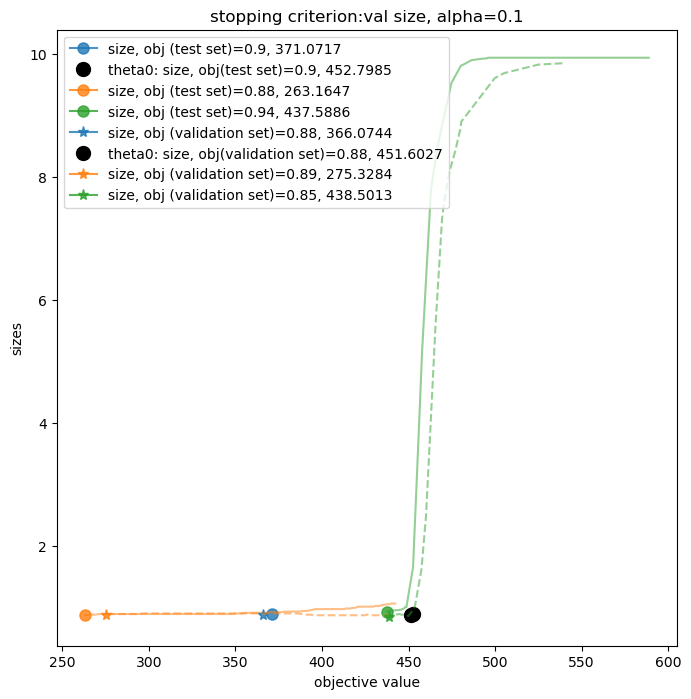

In [36]:
rObjs = numpy.load('rObjs.npy')
rRef = numpy.load('rRef.npy')
rThetas = numpy.load('rThetas.npy')
rPars = numpy.load('rPars.npy')
#ot, ov, st, sv, ft, fv, vt, vv 
plt.figure(figsize=[8, 8])      
stopping = 'val size'
    
for idata in [0, 1]:
    if idata == 0:
        x = 1
        y = 3
        line = '-'
        title = 'test set' 
        marker = 'o'
    else:
        x = 0
        y = 2
        line = '--'
        title = 'validation set'
        marker = '*'
    
    for iExp in range(len(rObjs)):
        ot, ov, st, sv, ft, fv, vt, vv   = rObjs[iExp]
        rot, rov, rst, rsv, rft, rfv, rvt, rvv  = rRef[iExp] 
        eta, T, alphaTarget, sizeBatch, K = rPars[iExp]
        o = rObjs[iExp][x]
        s = rObjs[iExp][y]
        ro = rRef[iExp][x]
        rs = rRef[iExp][y]
        if stopping == 'val size':
            stop = numpy.argmin(sv)
        else:
            stop = numpy.argmin(so)
        plt.plot(o[:stop+1], s[:stop+1], color=colors[iExp], linestyle=line, alpha=.5, markersize=4)
        plt.plot(o[stop], s[stop], color=colors[iExp], alpha=.8, markersize=8, marker=marker, 
             label='size, obj ('+title+')='+str(numpy.round(s[stop], 4))+', '+str(numpy.round(o[stop], 4)))  
        if iExp==0:
            plt.plot(ro, rs, 'ko', markersize=10, 
                     label='theta0: size, obj('+title+')='+str(numpy.round(rs, 4))+', '+str(numpy.round(ro, 4)))
plt.ylabel('sizes')
plt.xlabel('objective value')
plt.title('stopping criterion:' + stopping +', alpha='+str(alphaTarget))
plt.legend()
plt.show()


Here we measure the correlations between the value of the objective function and the size of the PS and the F1 score.
Averaging over $\alpha$ does not seem to compromise the objective function effectiveness even if the goal is to minimize the size of the prediction set a the specific confidence level (here we set $\alpha=0.1$ at test time). 
Intuitively, this happens because all quantities are roughly motonic in $\alpha$.

In [66]:
seedStart = 123456
data = val1, val2, cal, test

Nthetas = 10
thetas = [[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]]
for iN in range(Nthetas):
    thetas.append([.2 * numpy.random.randn(5) for i in [0, 1]])

NKs = 10
tryK = numpy.exp(numpy.linspace(-3, 2, NKs))
alphaTarget = .1

sizeDatasets = 25

objK = []
scoresK = []
sizesK = []
f1K = []
valK = []
for iN in range(NKs):
    K = tryK[iN]
    s = []
    o = []
    f = []
    v = []
    numpy.random.seed(seedStart)
    for k in range(len(thetas)):
        ddata = [prepareData(data[i]) for i in range(len(data))]    
        choice = numpy.random.choice(len(ddata[0][0]), size=sizeDatasets, replace=False)
        evaluationData =[[numpy.array([x[i] for i in choice]) for x in d] for d in ddata] 
        evaluation = evaluate(evaluationData, thetas[k], K, alphaTarget)
        o.append(evaluation[0])
        s.append(evaluation[2])
        f.append(evaluation[4])
        v.append(evaluation[6])
    o = numpy.array(o)
    s = numpy.array(s)
    f = numpy.array(f)
    v = numpy.array(v)
    
    corr = numpy.round((o @ s)/numpy.sqrt((o @ o) * (s @ s)), 5) #- corr0    
    scoresK.append([K, corr])
    sizesK.append(s)
    objK.append(o)
    f1K.append(f)
    valK.append(v)
    print('K, corr, f1, sizes', K, corr, numpy.mean(f), numpy.mean(s))

resultsK = scoresK, sizesK, objK, f1K, valK
numpy.save('resultsK.npy', resultsK)

K, corr, f1, sizes 0.049787068367863944 0.99089 0.9333690710882183 1.0472727272727271
K, corr, f1, sizes 0.09697196786440505 0.99099 0.9333690710882183 1.0472727272727271
K, corr, f1, sizes 0.18887560283756183 0.9912 0.9333690710882183 1.0472727272727271
K, corr, f1, sizes 0.36787944117144233 0.99161 0.9333690710882183 1.0472727272727271
K, corr, f1, sizes 0.7165313105737892 0.99236 0.9333690710882183 1.0472727272727271
K, corr, f1, sizes 1.395612425086089 0.99365 0.9333690710882183 1.0472727272727271
K, corr, f1, sizes 2.718281828459045 0.99529 0.9333690710882183 1.0472727272727271
K, corr, f1, sizes 5.294490050470026 0.99599 0.9333690710882183 1.0472727272727271
K, corr, f1, sizes 10.312258501325761 0.99567 0.9333690710882183 1.0472727272727271
K, corr, f1, sizes 20.085536923187668 0.99559 0.9333690710882183 1.0472727272727271


C:\Users\ugqm002\Miniconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


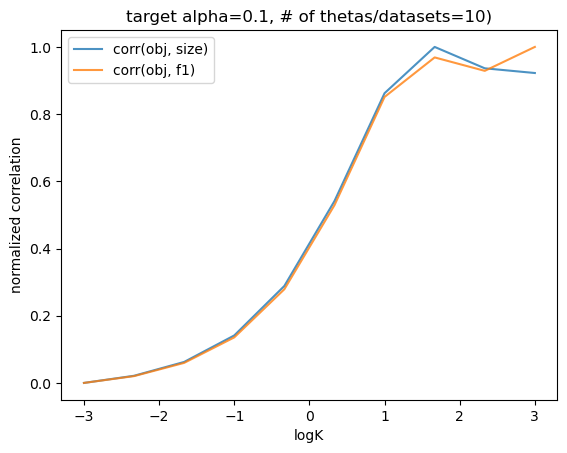

In [67]:
def computeCorrelation(x, y):
    return (x @ y)/numpy.sqrt((x @ x) * (y @ y))

def minmax(x):
    return (x-min(x))/(max(x)-min(x))
scoresK, sizesK, objK, f1K, valK = numpy.load('resultsK.npy', allow_pickle=True)
osCorr = minmax([computeCorrelation(sizesK[t], objK[t]) for t in range(len(scoresK))])
ofCorr = minmax([computeCorrelation(f1K[t], objK[t]) for t in range(len(scoresK))])

plt.plot(numpy.log(tryK), osCorr, alpha=.8, label='corr(obj, size)')
plt.plot(numpy.log(tryK), ofCorr, alpha=.8, label='corr(obj, f1)')
plt.ylabel('normalized correlation')
plt.xlabel('logK')
plt.title('target alpha='+str(alphaTarget)+', # of thetas/datasets='+str(Nthetas)+')')
plt.legend()
plt.show()
